In [ ]:
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Scenario 1:

In [ ]:
# Define parameters
S <- 100  # Asset price
K <- 100  # Strike price
sigma <- 0.2  # Volatility
T <- 0.5  # Time to maturity (in years)
r <- 0.06  # Risk-free rate
N_values <- c(50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 5000)  # Number of time steps
k_values <- c(1, 0, -1)  # Tilt parameter values

# Function to calculate up and down factors and probabilities
calculate_factors <- function(T, N, sigma, r, k) {
  dt <- T / N
  u <- exp((k * sigma^2) * dt + sigma * sqrt(dt))
  d <- exp((k * sigma^2) * dt - sigma * sqrt(dt))
  p <- (exp(r * dt) - d) / (u - d)

  return(list(u = u, d = d, p = p))
}

# Function to construct binomial tree and calculate option price
binomial_tree <- function(T, N, S, K, sigma, r, k) {
  factors <- calculate_factors(T, N, sigma, r, k)
  u <- factors$u
  d <- factors$d
  p <- factors$p
  dt <- T / N
  discount_factor <- exp(-r * dt)

  # Initialize asset prices at maturity
  asset_prices <- matrix(0, nrow = N + 1, ncol = N + 1)
  option_values <- matrix(0, nrow = N + 1, ncol = N + 1)

  #The loop initializes asset prices and option values at maturity.
  for (j in 0:N) {
    asset_prices[N + 1, j + 1] <- S * (u ^ j) * (d ^ (N - j))
    option_values[N + 1, j + 1] <- max(asset_prices[N + 1, j + 1] - K, 0)
  }

  # Backward induction (calculates the option price at each node by discounting the expected value of the option at the next time step.)
  for (i in (N - 1):0) {
    for (j in 0:i) {
      option_values[i + 1, j + 1] <- discount_factor * (p * option_values[i + 2, j + 2] + (1 - p) * option_values[i + 2, j + 1])
    }
  }

  return(option_values[1, 1])
}

# Calculate option prices for different N and k values
results <- data.frame(N = integer(), k = numeric(), Price = numeric())

for (k in k_values) {
  for (N in N_values) {
    price <- binomial_tree(T, N, S, K, sigma, r, k)
    results <- rbind(results, data.frame(N = N, k = k, Price = price))
  }
}

# Print results
print(results)

      N  k    Price
1    50  1 7.182884
2   100  1 7.164846
3   150  1 7.155258
4   200  1 7.149079
5   300  1 7.157617
6   400  1 7.159055
7   500  1 7.158452
8   600  1 7.157176
9   700  1 7.155696
10  800  1 7.154191
11  900  1 7.155660
12 1000  1 7.156482
13 5000  1 7.155623
14   50  0 7.127600
15  100  0 7.141730
16  150  0 7.146448
17  200  0 7.148808
18  300  0 7.151170
19  400  0 7.152351
20  500  0 7.153060
21  600  0 7.153533
22  700  0 7.153870
23  800  0 7.154123
24  900  0 7.154320
25 1000  0 7.154478
26 5000  0 7.155612
27   50 -1 7.178530
28  100 -1 7.162409
29  150 -1 7.153669
30  200 -1 7.147994
31  300 -1 7.156951
32  400 -1 7.158529
33  500 -1 7.158007
34  600 -1 7.156796
35  700 -1 7.155373
36  800 -1 7.153920
37  900 -1 7.155428
38 1000 -1 7.156275
39 5000 -1 7.155580


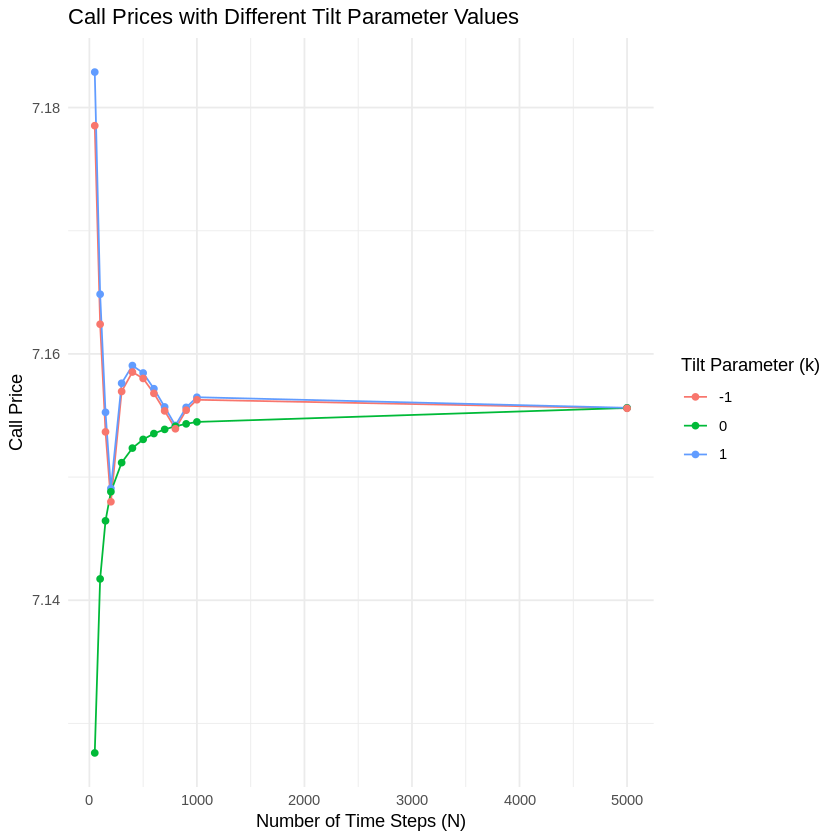

In [ ]:
ggplot(results, aes(x = N, y = Price, color = factor(k), group = factor(k))) +
  geom_line() +
  geom_point() +
  labs(title = "Call Prices with Different Tilt Parameter Values",
       x = "Number of Time Steps (N)",
       y = "Call Price",
       color = "Tilt Parameter (k)") +
  theme_minimal()

### Scenario 2:

In [ ]:
# Define parameters
S <- 80  # Asset price
K <- 80  # Strike price
sigma <- 0.2  # Volatility
T <- 0.5  # Time to maturity (in years)
r <- 0.06  # Risk-free rate
N_values <- c(50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 5000)  # Number of time steps
k_values <- c(1, 0, -1)  # Tilt parameter values

# Function to calculate up and down factors and probabilities
calculate_factors <- function(T, N, sigma, r, k) {
  dt <- T / N
  u <- exp((k * sigma^2) * dt + sigma * sqrt(dt))
  d <- exp((k * sigma^2) * dt - sigma * sqrt(dt))
  p <- (exp(r * dt) - d) / (u - d)

  return(list(u = u, d = d, p = p))
}

# Function to construct binomial tree and calculate option price
binomial_tree <- function(T, N, S, K, sigma, r, k) {
  factors <- calculate_factors(T, N, sigma, r, k)
  u <- factors$u
  d <- factors$d
  p <- factors$p
  dt <- T / N
  discount_factor <- exp(-r * dt)

  # Initialize asset prices at maturity
  asset_prices <- matrix(0, nrow = N + 1, ncol = N + 1)
  option_values <- matrix(0, nrow = N + 1, ncol = N + 1)

  for (j in 0:N) {
    asset_prices[N + 1, j + 1] <- S * (u ^ j) * (d ^ (N - j))
    option_values[N + 1, j + 1] <- max(asset_prices[N + 1, j + 1] - K, 0)
  }

  # Backward induction
  for (i in (N - 1):0) {
    for (j in 0:i) {
      option_values[i + 1, j + 1] <- discount_factor * (p * option_values[i + 2, j + 2] + (1 - p) * option_values[i + 2, j + 1])
    }
  }

  return(option_values[1, 1])
}

# Calculate option prices for different N and k values
results <- data.frame(N = integer(), k = numeric(), Price = numeric())

for (k in k_values) {
  for (N in N_values) {
    price <- binomial_tree(T, N, S, K, sigma, r, k)
    results <- rbind(results, data.frame(N = N, k = k, Price = price))
  }
}

# Print results
print(results)

      N  k    Price
1    50  1 5.746307
2   100  1 5.731877
3   150  1 5.724207
4   200  1 5.719263
5   300  1 5.726094
6   400  1 5.727244
7   500  1 5.726761
8   600  1 5.725741
9   700  1 5.724557
10  800  1 5.723353
11  900  1 5.724528
12 1000  1 5.725186
13 5000  1 5.724499
14   50  0 5.702080
15  100  0 5.713384
16  150  0 5.717158
17  200  0 5.719047
18  300  0 5.720936
19  400  0 5.721881
20  500  0 5.722448
21  600  0 5.722826
22  700  0 5.723096
23  800  0 5.723299
24  900  0 5.723456
25 1000  0 5.723582
26 5000  0 5.724490
27   50 -1 5.742824
28  100 -1 5.729927
29  150 -1 5.722935
30  200 -1 5.718395
31  300 -1 5.725561
32  400 -1 5.726823
33  500 -1 5.726406
34  600 -1 5.725437
35  700 -1 5.724298
36  800 -1 5.723136
37  900 -1 5.724342
38 1000 -1 5.725020
39 5000 -1 5.724464


In [ ]:
# Black-Scholes formula for a call option
black_scholes_call <- function(S, K, T, r, sigma) {
  d1 <- (log(S / K) + (r + 0.5 * sigma^2) * T) / (sigma * sqrt(T))
  d2 <- d1 - sigma * sqrt(T)
  call_price <- S * pnorm(d1) - K * exp(-r * T) * pnorm(d2)
  return(call_price)
}

# Calculate Black-Scholes price
bs_price <- black_scholes_call(S, K, T, r, sigma)
bs_price

[1] 5.724717

In [ ]:
# Define parameters
S <- 100  # Asset price
K <- 95  # Strike price
sigma <- 0.2  # Volatility
T <- 0.5  # Time to maturity (in years)
r <- 0.06  # Risk-free rate
N_values <- 10:100  # Number of time steps
k_values <- c(1, 0, -1)  # Tilt parameter values

# Function to calculate up and down factors and probabilities
calculate_factors <- function(T, N, sigma, r, k) {
  dt <- T / N
  u <- exp((k * sigma^2) * dt + sigma * sqrt(dt))
  d <- exp((k * sigma^2) * dt - sigma * sqrt(dt))
  p <- (exp(r * dt) - d) / (u - d)

  return(list(u = u, d = d, p = p))
}

# Function to construct binomial tree and calculate option price
binomial_tree <- function(T, N, S, K, sigma, r, k) {
  factors <- calculate_factors(T, N, sigma, r, k)
  u <- factors$u
  d <- factors$d
  p <- factors$p
  dt <- T / N
  discount_factor <- exp(-r * dt)

  # Initialize asset prices at maturity
  asset_prices <- matrix(0, nrow = N + 1, ncol = N + 1)
  option_values <- matrix(0, nrow = N + 1, ncol = N + 1)

  for (j in 0:N) {
    asset_prices[N + 1, j + 1] <- S * (u ^ j) * (d ^ (N - j))
    option_values[N + 1, j + 1] <- max(asset_prices[N + 1, j + 1] - K, 0)
  }

  # Backward induction
  for (i in (N - 1):0) {
    for (j in 0:i) {
      option_values[i + 1, j + 1] <- discount_factor * (p * option_values[i + 2, j + 2] + (1 - p) * option_values[i + 2, j + 1])
    }
  }

  return(option_values[1, 1])
}

# Calculate option prices for different N and k values
results <- data.frame(N = integer(), k = numeric(), Price = numeric())

for (k in k_values) {
  for (N in N_values) {
    price <- binomial_tree(T, N, S, K, sigma, r, k)
    results <- rbind(results, data.frame(N = N, k = k, Price = price))
  }
}

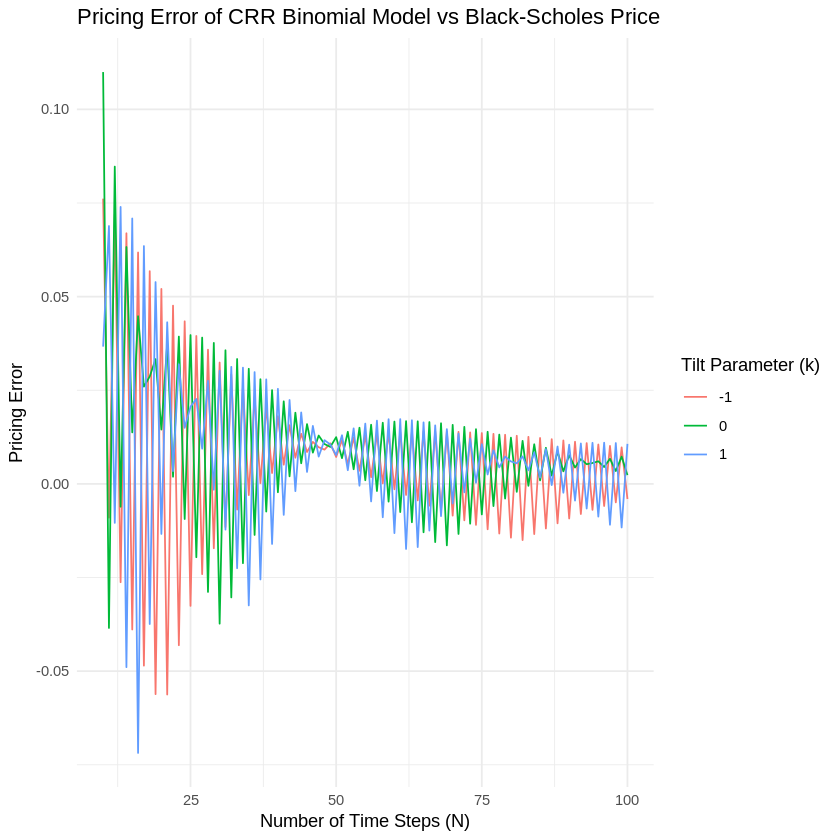

In [ ]:
# Black-Scholes formula for a call option
black_scholes_call <- function(S, K, T, r, sigma) {
  d1 <- (log(S / K) + (r + 0.5 * sigma^2) * T) / (sigma * sqrt(T))
  d2 <- d1 - sigma * sqrt(T)
  call_price <- S * pnorm(d1) - K * exp(-r * T) * pnorm(d2)
  return(call_price)
}

# Calculate Black-Scholes price
bs_price <- black_scholes_call(S, K, T, r, sigma)

# Calculate pricing error
results$Pricing_Error <- results$Price - bs_price

# Plot the pricing error
ggplot(results, aes(x = N, y = Pricing_Error, color = as.factor(k))) +
  geom_line() +
  labs(title = "Pricing Error of CRR Binomial Model vs Black-Scholes Price",
       x = "Number of Time Steps (N)",
       y = "Pricing Error",
       color = "Tilt Parameter (k)") +
  theme_minimal()

### Scenario 3: With Black Scholes Price

Warning message:
“`geom_hline()`: Ignoring `mapping` because `yintercept` was provided.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


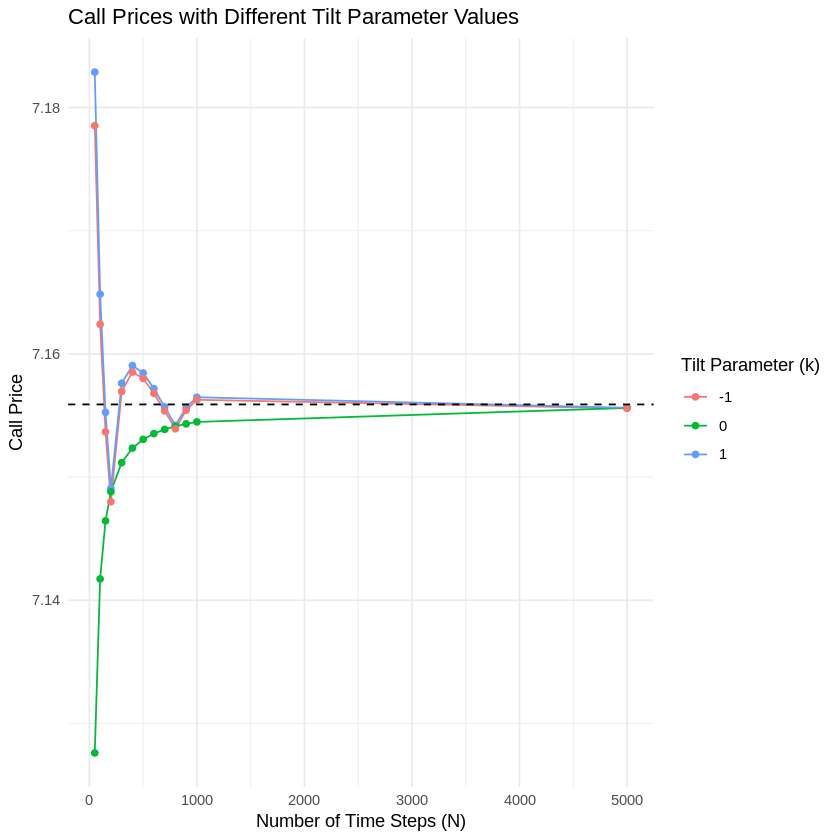

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Define parameters
S <- 100  # Asset price
K <- 100  # Strike price
sigma <- 0.2  # Volatility
T <- 0.5  # Time to maturity (in years)
r <- 0.06  # Risk-free rate
N_values <- c(50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 5000)  # Number of time steps
k_values <- c(1, 0, -1)  # Tilt parameter values

# Function to calculate up and down factors and probabilities
calculate_factors <- function(T, N, sigma, r, k) {
  dt <- T / N
  u <- exp((k * sigma^2) * dt + sigma * sqrt(dt))
  d <- exp((k * sigma^2) * dt - sigma * sqrt(dt))
  p <- (exp(r * dt) - d) / (u - d)

  return(list(u = u, d = d, p = p))
}

# Function to construct binomial tree and calculate option price
binomial_tree <- function(T, N, S, K, sigma, r, k) {
  factors <- calculate_factors(T, N, sigma, r, k)
  u <- factors$u
  d <- factors$d
  p <- factors$p
  dt <- T / N
  discount_factor <- exp(-r * dt)

  # Initialize asset prices at maturity
  asset_prices <- matrix(0, nrow = N + 1, ncol = N + 1)
  option_values <- matrix(0, nrow = N + 1, ncol = N + 1)

  for (j in 0:N) {
    asset_prices[N + 1, j + 1] <- S * (u ^ j) * (d ^ (N - j))
    option_values[N + 1, j + 1] <- max(asset_prices[N + 1, j + 1] - K, 0)
  }

  # Backward induction
  for (i in (N - 1):0) {
    for (j in 0:i) {
      option_values[i + 1, j + 1] <- discount_factor * (p * option_values[i + 2, j + 2] + (1 - p) * option_values[i + 2, j + 1])
    }
  }

  return(option_values[1, 1])
}

# Function to calculate Black-Scholes price
black_scholes_price <- function(S, K, T, r, sigma) {
  d1 <- (log(S / K) + (r + sigma^2 / 2) * T) / (sigma * sqrt(T))
  d2 <- d1 - sigma * sqrt(T)
  C <- S * pnorm(d1) - K * exp(-r * T) * pnorm(d2)
  return(C)
}

# Calculate Black-Scholes price
bs_price <- black_scholes_price(S, K, T, r, sigma)

# Calculate option prices for different N and k values
results <- data.frame(N = integer(), k = numeric(), Price = numeric())

for (k in k_values) {
  for (N in N_values) {
    price <- binomial_tree(T, N, S, K, sigma, r, k)
    results <- rbind(results, data.frame(N = N, k = k, Price = price))
  }
}

# Add Black-Scholes price to the results for comparison
bs_results <- data.frame(N = N_values,
                         k = rep("Black-Scholes", length(N_values)),
                         Price = rep(bs_price, length(N_values)))
results <- rbind(results, bs_results)

# Plot the results using ggplot2
ggplot(results %>% filter(k != "Black-Scholes"), aes(x = N, y = Price)) +
  geom_line(aes(color = factor(k), group = factor(k))) +
  geom_point(aes(color = factor(k), group = factor(k))) +
  geom_hline(yintercept = bs_price,
             linetype = "dashed",
             color = "black",
             size = .5,
             show.legend = TRUE,
             aes(label="Black-Scholes")) +
  labs(title = "Call Prices with Different Tilt Parameter Values",
       x = "Number of Time Steps (N)",
       y = "Call Price",
       color = "Tilt Parameter (k)") +
  theme_minimal()

### Pricing Error:

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(knitr)

# Define parameters
S <- 100  # Asset price
K <- 95  # Strike price
sigma <- 0.2  # Volatility
T <- 0.5  # Time to maturity (in years)
r <- 0.06  # Risk-free rate
N_values <- 10:100  # Number of time steps
k_values <- c(1, 0, -1)  # Tilt parameter values

# Function to calculate up and down factors and probabilities
calculate_factors <- function(T, N, sigma, r, k) {
  dt <- T / N
  u <- exp((k * sigma^2) * dt + sigma * sqrt(dt))
  d <- exp((k * sigma^2) * dt - sigma * sqrt(dt))
  p <- (exp(r * dt) - d) / (u - d)

  return(list(u = u, d = d, p = p))
}

# Function to construct binomial tree and calculate option price
binomial_tree <- function(T, N, S, K, sigma, r, k) {
  factors <- calculate_factors(T, N, sigma, r, k)
  u <- factors$u
  d <- factors$d
  p <- factors$p
  dt <- T / N
  discount_factor <- exp(-r * dt)

  # Initialize asset prices at maturity
  asset_prices <- matrix(0, nrow = N + 1, ncol = N + 1)
  option_values <- matrix(0, nrow = N + 1, ncol = N + 1)

  # The loop initializes asset prices and option values at maturity.
  for (j in 0:N) {
    asset_prices[N + 1, j + 1] <- S * (u ^ j) * (d ^ (N - j))
    option_values[N + 1, j + 1] <- max(asset_prices[N + 1, j + 1] - K, 0)
  }

  # Backward induction (calculates the option price at each node by discounting the expected value of the option at the next time step.)
  for (i in (N - 1):0) {
    for (j in 0:i) {
      option_values[i + 1, j + 1] <- discount_factor * (p * option_values[i + 2, j + 2] + (1 - p) * option_values[i + 2, j + 1])
    }
  }

  return(option_values[1, 1])
}

# Function to calculate Black-Scholes price
black_scholes_price <- function(S, K, T, r, sigma) {
  d1 <- (log(S / K) + (r + sigma^2 / 2) * T) / (sigma * sqrt(T))
  d2 <- d1 - sigma * sqrt(T)
  C <- S * pnorm(d1) - K * exp(-r * T) * pnorm(d2)
  return(C)
}

# Calculate option prices for different N and k values
results <- data.frame(N = integer(), k = numeric(), Price = numeric())

for (k in k_values) {
  for (N in N_values) {
    price <- binomial_tree(T, N, S, K, sigma, r, k)
    results <- rbind(results, data.frame(N = N, k = k, Price = price))
  }
}

# Calculate Black-Scholes price and add it to the results
bs_price <- black_scholes_price(S, K, T, r, sigma)
results <- rbind(results, data.frame(N = "Black-Scholes Price", k = NA, Price = bs_price))

# Reshape the results to have time steps as rows and lambda values as columns
results_wide <- results %>%
  pivot_wider(names_from = k, values_from = Price, names_prefix = "lambda=")

# Print results in a table format
kable(results_wide, caption = "Option Prices for Different N and k Values, Including Black-Scholes Price")



Table: Option Prices for Different N and k Values, Including Black-Scholes Price

|N                   | lambda=1| lambda=0| lambda=-1| lambda=NA|
|:-------------------|--------:|--------:|---------:|---------:|
|10                  | 10.22672| 10.30002|  10.26621|        NA|
|11                  | 10.25891| 10.15159|  10.18104|        NA|
|12                  | 10.17965| 10.27478|  10.26198|        NA|
|13                  | 10.26401| 10.18396|  10.16381|        NA|
|14                  | 10.14112| 10.25331|  10.25698|        NA|
|15                  | 10.26093| 10.20381|  10.15118|        NA|
|16                  | 10.11822| 10.23483|  10.25185|        NA|
|17                  | 10.25356| 10.21603|  10.14153|        NA|
|18                  | 10.15264| 10.21874|  10.24686|        NA|
|19                  | 10.24395| 10.22337|  10.13392|        NA|
|20                  | 10.17670| 10.20457|  10.24212|        NA|
|21                  | 10.23321| 10.22748|  10.13382|        NA|
|22   

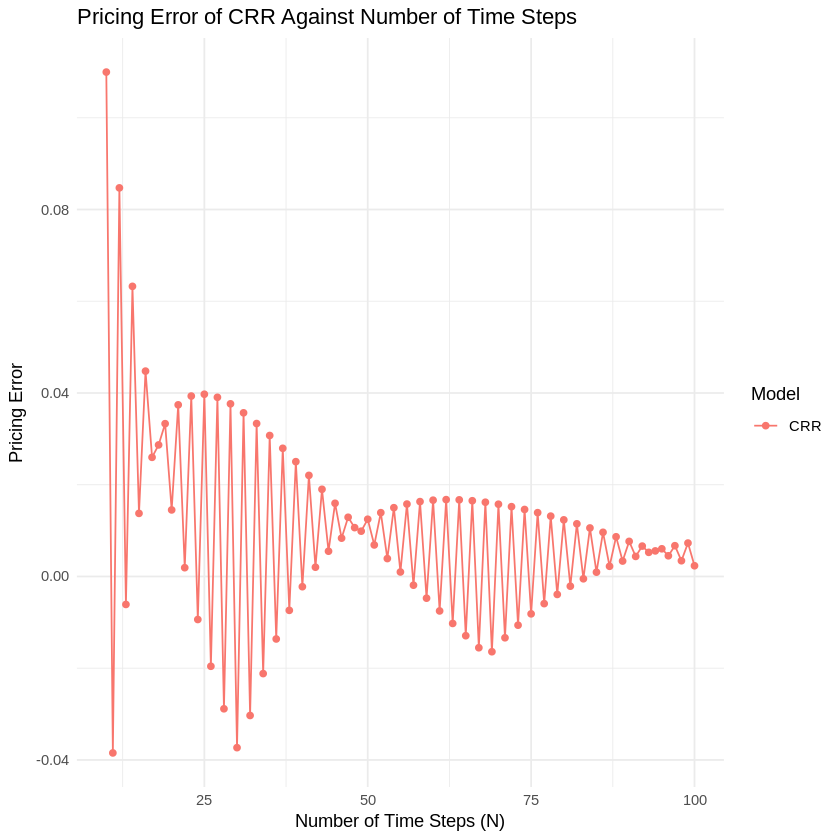

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Define parameters
S <- 100  # Asset price
K <- 95  # Strike price
sigma <- 0.2  # Volatility
T <- 0.5  # Time to maturity (in years)
r <- 0.06  # Risk-free rate
N_values <- 10:100  # Number of time steps

# Function to calculate up and down factors and probabilities for CRR model
calculate_factors_crr <- function(T, N, sigma, r) {
  dt <- T / N
  u <- exp(sigma * sqrt(dt))
  d <- exp(-sigma * sqrt(dt))
  p <- (exp(r * dt) - d) / (u - d)

  return(list(u = u, d = d, p = p))
}

# Function to construct binomial tree and calculate option price for CRR model
binomial_tree_crr <- function(T, N, S, K, sigma, r) {
  factors <- calculate_factors_crr(T, N, sigma, r)
  u <- factors$u
  d <- factors$d
  p <- factors$p
  dt <- T / N
  discount_factor <- exp(-r * dt)

  # Initialize asset prices at maturity
  asset_prices <- matrix(0, nrow = N + 1, ncol = N + 1)
  option_values <- matrix(0, nrow = N + 1, ncol = N + 1)

  for (j in 0:N) {
    asset_prices[N + 1, j + 1] <- S * (u ^ j) * (d ^ (N - j))
    option_values[N + 1, j + 1] <- max(asset_prices[N + 1, j + 1] - K, 0)
  }

  # Backward induction
  for (i in (N - 1):0) {
    for (j in 0:i) {
      option_values[i + 1, j + 1] <- discount_factor * (p * option_values[i + 2, j + 2] + (1 - p) * option_values[i + 2, j + 1])
    }
  }

  return(option_values[1, 1])
}




# Function to calculate Black-Scholes price
black_scholes_price <- function(S, K, T, r, sigma) {
  d1 <- (log(S / K) + (r + sigma^2 / 2) * T) / (sigma * sqrt(T))
  d2 <- d1 - sigma * sqrt(T)
  C <- S * pnorm(d1) - K * exp(-r * T) * pnorm(d2)
  return(C)
}

# Calculate Black-Scholes price
bs_price <- black_scholes_price(S, K, T, r, sigma)

# Calculate option prices and pricing errors for different N values using CRR model and FB model with k=0.5
results <- data.frame(N = integer(), Model = character(), Price = numeric(), Error = numeric())

for (N in N_values) {
  price_crr <- binomial_tree_crr(T, N, S, K, sigma, r)
  error_crr <- price_crr - bs_price
  results <- rbind(results, data.frame(N = N, Model = "CRR", Price = price_crr, Error = error_crr))

}

# Plot the pricing errors using ggplot2
ggplot(results, aes(x = N, y = Error, color = Model)) +
  geom_line() +
  geom_point() +
  labs(title = "Pricing Error of CRR Against Number of Time Steps",
       x = "Number of Time Steps (N)",
       y = "Pricing Error") +
  theme_minimal()

Warning message:
“Removed 22 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 26 rows containing missing values or values outside the scale range
(`geom_point()`).”


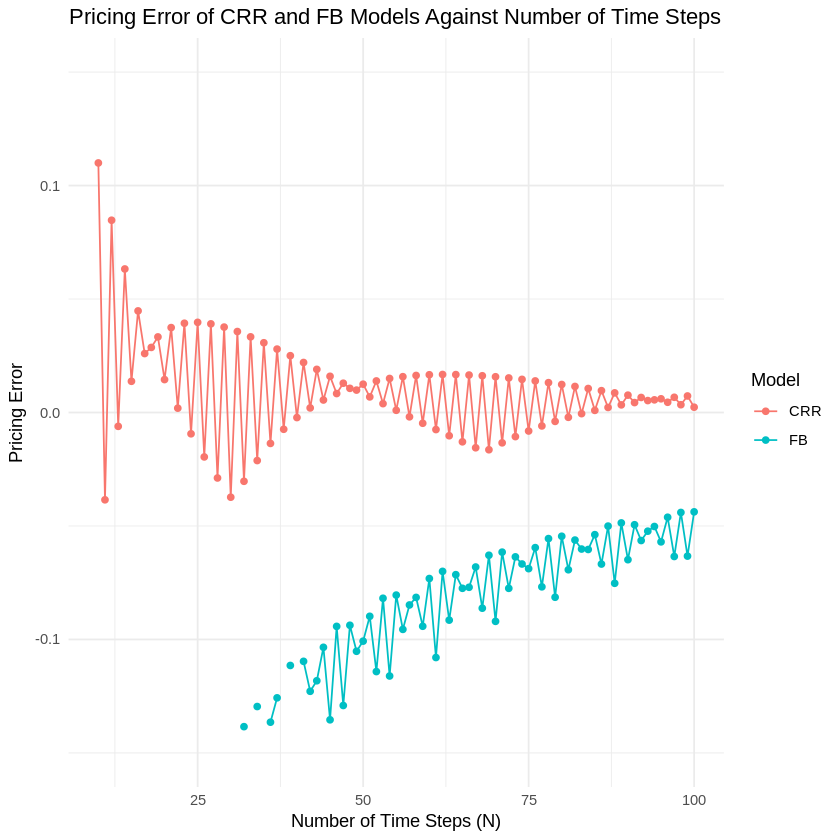

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Define parameters
S <- 100  # Asset price
K <- 95  # Strike price
sigma <- 0.2  # Volatility
T <- 0.5  # Time to maturity (in years)
r <- 0.06  # Risk-free rate
N_values <- 10:100  # Number of time steps

# Function to calculate up and down factors and probabilities for CRR model
calculate_factors_crr <- function(T, N, sigma, r) {
  dt <- T / N
  u <- exp(sigma * sqrt(dt))
  d <- exp(-sigma * sqrt(dt))
  p <- (exp(r * dt) - d) / (u - d)

  return(list(u = u, d = d, p = p))
}

# Function to construct binomial tree and calculate option price for CRR model
binomial_tree_crr <- function(T, N, S, K, sigma, r) {
  factors <- calculate_factors_crr(T, N, sigma, r)
  u <- factors$u
  d <- factors$d
  p <- factors$p
  dt <- T / N
  discount_factor <- exp(-r * dt)

  # Initialize asset prices at maturity
  asset_prices <- matrix(0, nrow = N + 1, ncol = N + 1)
  option_values <- matrix(0, nrow = N + 1, ncol = N + 1)

  for (j in 0:N) {
    asset_prices[N + 1, j + 1] <- S * (u ^ j) * (d ^ (N - j))
    option_values[N + 1, j + 1] <- max(asset_prices[N + 1, j + 1] - K, 0)
  }

  # Backward induction
  for (i in (N - 1):0) {
    for (j in 0:i) {
      option_values[i + 1, j + 1] <- discount_factor * (p * option_values[i + 2, j + 2] + (1 - p) * option_values[i + 2, j + 1])
    }
  }

  return(option_values[1, 1])
}

# Function to calculate up and down factors and probabilities for FB model with k=0.5
calculate_factors_fb <- function(T, N, sigma, r) {
  dt <- T / N
  k <- 11
  u <- exp((k * sigma^2) * dt + sigma * sqrt(dt))
  d <- exp((k * sigma^2) * dt - sigma * sqrt(dt))
  p <- (exp(r * dt) - d) / (u - d)

  return(list(u = u, d = d, p = p))
}

# Function to construct binomial tree and calculate option price for FB model with k=0.5
binomial_tree_fb <- function(T, N, S, K, sigma, r) {
  factors <- calculate_factors_fb(T, N, sigma, r)
  u <- factors$u
  d <- factors$d
  p <- factors$p
  dt <- T / N
  discount_factor <- exp(-r * dt)

  # Initialize asset prices at maturity
  asset_prices <- matrix(0, nrow = N + 1, ncol = N + 1)
  option_values <- matrix(0, nrow = N + 1, ncol = N + 1)

  for (j in 0:N) {
    asset_prices[N + 1, j + 1] <- S * (u ^ j) * (d ^ (N - j))
    option_values[N + 1, j + 1] <- max(asset_prices[N + 1, j + 1] - K, 0)
  }

  # Backward induction
  for (i in (N - 1):0) {
    for (j in 0:i) {
      option_values[i + 1, j + 1] <- discount_factor * (p * option_values[i + 2, j + 2] + (1 - p) * option_values[i + 2, j + 1])
    }
  }

  return(option_values[1, 1])
}

# Function to calculate Black-Scholes price
black_scholes_price <- function(S, K, T, r, sigma) {
  d1 <- (log(S / K) + (r + sigma^2 / 2) * T) / (sigma * sqrt(T))
  d2 <- d1 - sigma * sqrt(T)
  C <- S * pnorm(d1) - K * exp(-r * T) * pnorm(d2)
  return(C)
}

# Calculate Black-Scholes price
bs_price <- black_scholes_price(S, K, T, r, sigma)

# Calculate option prices and pricing errors for different N values using CRR model and FB model with k=0.5
results <- data.frame(N = integer(), Model = character(), Price = numeric(), Error = numeric())

for (N in N_values) {
  price_crr <- binomial_tree_crr(T, N, S, K, sigma, r)
  error_crr <- price_crr - bs_price
  results <- rbind(results, data.frame(N = N, Model = "CRR", Price = price_crr, Error = error_crr))

  price_fb <- binomial_tree_fb(T, N, S, K, sigma, r)
  error_fb <- price_fb - bs_price
  results <- rbind(results, data.frame(N = N, Model = "FB", Price = price_fb, Error = error_fb))
}

# Plot the pricing errors using ggplot2
ggplot(results, aes(x = N, y = Error, color = Model)) +
  geom_line() +
  geom_point() +
  labs(title = "Pricing Error of CRR and FB Models Against Number of Time Steps",
       x = "Number of Time Steps (N)",
       y = "Pricing Error") +
  ylim(-0.15,0.15) +
  theme_minimal()